<a href="https://colab.research.google.com/github/cruzmarcela02/ciencia-de-datos/blob/main/TP1-aerolineas/colab-analisis/individuales_servicios_tendencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### CARGA ARCHIVO **filtered_customer_booking.csv**

In [ ]:
# Cargamos archivos:
# 1. https://drive.google.com/file/d/1ZJIc1Y_0G4hdx_0GkTrw10IYrlAE4SoQ/view?usp=drive_link
id='1ZJIc1Y_0G4hdx_0GkTrw10IYrlAE4SoQ'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('filtered_customer_booking.csv')

In [ ]:
 # 2. https://drive.google.com/file/d/1XGEH-SRn9wde2vZC5lHtYjYNKSPtxsiY/view?usp=drive_link
id='1XGEH-SRn9wde2vZC5lHtYjYNKSPtxsiY'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('customer_airways_data.csv')

In [ ]:
# 3. https://drive.google.com/file/d/132CgYVqb-uygkp8wM80ur_cghtUDaEI7/view?usp=sharing
id='132CgYVqb-uygkp8wM80ur_cghtUDaEI7'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('cleaned-reviews.csv')

In [ ]:
# 4. https://drive.google.com/file/d/14GjEtEbD2al063LU0thzp-jRhuJKgvql/view?usp=drive_link
id='14GjEtEbD2al063LU0thzp-jRhuJKgvql'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('airline_data.csv')

# **Abrimos los DataFrame**

In [ ]:
archivo_dos = pd.read_csv("customer_airways_data.csv", encoding='iso-8859-1')
archivo_dos

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


# **LIMPIEZA**

In [ ]:
# Filtramos los vuelos individuales
individuales = archivo_dos.loc[archivo_dos.num_passengers == 1]
individuales

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,1,Internet,RoundTrip,19,6,12,Sun,PERPNH,Australia,1,0,0,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
#TOP 3 servicios por canal de venta
individuales_top_servicio = individuales[['num_passengers' ,'trip_type', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']]
individuales_top_servicio

,num_passengers,trip_type,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals
1,1,RoundTrip,0,0,0
3,1,RoundTrip,0,0,1
5,1,RoundTrip,1,0,1
8,1,RoundTrip,0,0,1
9,1,RoundTrip,0,0,0
...,...,...,...,...,...
49993,1,RoundTrip,1,0,0
49996,1,RoundTrip,0,0,0
49997,1,RoundTrip,0,0,1
49998,1,RoundTrip,1,0,1


In [ ]:
individuales_top_servicio.groupby(['trip_type']).agg({'wants_extra_baggage': ['sum'], 'wants_preferred_seat':['sum'], 'wants_in_flight_meals': ['sum']})

,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals
,sum,sum,sum
trip_type,,,
CircleTrip,53,15,32
OneWay,172,61,89
RoundTrip,19323,8678,13082


In [ ]:
def seleccion_extras(equipaje, asiento, comida):
    # Sumamos los valores de cada Series para determinar el número de servicios
    total_servicios = equipaje + asiento + comida

    resultado = pd.Series(index=equipaje.index)

    # Condiciones para cada tipo de servicio
    resultado[(equipaje == 1) & (asiento == 1) & (comida == 1)] = 'Completo'
    resultado[(equipaje != 1) & (asiento != 1) & (comida != 1)] = 'Ninguno'

    resultado[(equipaje == 1) & (asiento == 1) & (comida != 1)] = 'Equipaje \n Asiento'
    resultado[(equipaje == 1) & (asiento != 1) & (comida == 1)] = 'Equipaje \n Comida'
    resultado[(equipaje == 1) & (asiento != 1) & (comida != 1)] = 'Equipaje'

    resultado[(equipaje != 1) & (asiento == 1) & (comida == 1)] = 'Asiento \n Comida'
    resultado[(equipaje != 1) & (asiento == 1) & (comida != 1)] = 'Asiento'

    resultado[(equipaje != 1) & (asiento != 1) & (comida == 1)] = 'Comida'

    return resultado


In [ ]:
individuales_top_servicio['Extras pedidos'] = seleccion_extras(individuales_top_servicio['wants_extra_baggage'], individuales_top_servicio['wants_preferred_seat'], individuales_top_servicio['wants_in_flight_meals'])

In [ ]:
individuales_top_servicio['Cantidad Servicios'] = individuales_top_servicio['wants_extra_baggage'] + individuales_top_servicio['wants_preferred_seat'] + individuales_top_servicio['wants_in_flight_meals']

In [ ]:
individuales_top_servicio

,num_passengers,trip_type,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,Extras pedidos,Cantidad Servicios
1,1,RoundTrip,0,0,0,Ninguno,0
3,1,RoundTrip,0,0,1,Comida,1
5,1,RoundTrip,1,0,1,Equipaje \n Comida,2
8,1,RoundTrip,0,0,1,Comida,1
9,1,RoundTrip,0,0,0,Ninguno,0
...,...,...,...,...,...,...,...
49993,1,RoundTrip,1,0,0,Equipaje,1
49996,1,RoundTrip,0,0,0,Ninguno,0
49997,1,RoundTrip,0,0,1,Comida,1
49998,1,RoundTrip,1,0,1,Equipaje \n Comida,2


In [ ]:
servicios_combinacion = individuales_top_servicio.groupby('Extras pedidos')['num_passengers'].sum().to_frame().reset_index()
servicios_combinacion

,Extras pedidos,num_passengers
0,Asiento,1158
1,Asiento \n Comida,847
2,Comida,2540
3,Completo,5039
4,Equipaje,8022
5,Equipaje \n Asiento,1710
6,Equipaje \n Comida,4777
7,Ninguno,7259


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Asiento'),
  Text(1, 0, 'Asiento \n Comida'),
  Text(2, 0, 'Comida'),
  Text(3, 0, 'Completo'),
  Text(4, 0, 'Equipaje'),
  Text(5, 0, 'Equipaje \n Asiento'),
  Text(6, 0, 'Equipaje \n Comida'),
  Text(7, 0, 'Ninguno')])

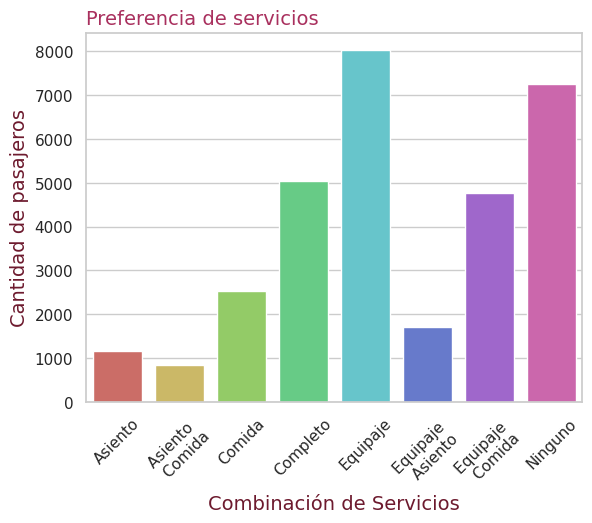

In [ ]:
combinacion_servicios = sns.barplot(servicios_combinacion, x="Extras pedidos", y="num_passengers", errorbar=None, palette='hls')
combinacion_servicios.set_xlabel('Combinación de Servicios', fontsize=14, color='#6D1A2E')
combinacion_servicios.set_ylabel('Cantidad de pasajeros', fontsize=14, color='#6D1A2E')
plt.title('Preferencia de servicios', loc='left', color='#A9305E', size=14)
plt.xticks(rotation=45)

In [ ]:
algun_servicio = servicios_combinacion.loc[servicios_combinacion['Extras pedidos'] != 'Ninguno']['num_passengers'].sum()

In [ ]:
ningun_servicio = 7259

In [ ]:
# Total coincide con los individuales
algun_servicio + ningun_servicio

31352

In [ ]:
# Un servicio = comida || asiento || equipaje
2540 + 1158 + 8022

11720

In [ ]:
# Dos servicios = equipaje & comida || equipaje & asiento || comida & asiento
4777 + 1710 +847

7334

In [ ]:
# Creamos un df para ser comparacion
servicios_cantidad = {'Servicio': ['Completo', 'Ninguno', 'Un Servicio', 'Dos Servicios'], 'Cantidad de pasajeros': [5039, 7259, 11720, 7334]}
servicios_cantidad_df = pd.DataFrame(servicios_cantidad)
servicios_cantidad_df

,Servicio,Cantidad de pasajeros
0,Completo,5039
1,Ninguno,7259
2,Un Servicio,11720
3,Dos Servicios,7334


In [ ]:
mis_colores = ['#32B166', '#F561DD', '#E07E3F', '#E0AD3F']

Text(0.0, 1.0, 'Cantidad de servicios a elegir por el pasajero')

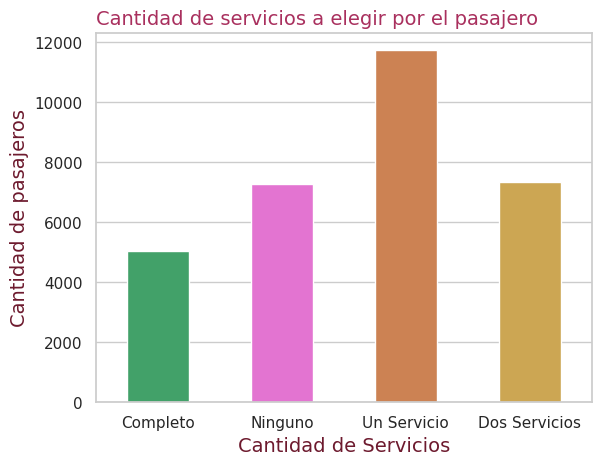

In [ ]:
servicios_cant = sns.barplot(servicios_cantidad_df, x="Servicio", y="Cantidad de pasajeros", errorbar=None, palette= mis_colores, width=0.5)
servicios_cant.set_xlabel('Cantidad de Servicios', fontsize=14, color='#6D1A2E')
servicios_cant.set_ylabel('Cantidad de pasajeros', fontsize=14, color='#6D1A2E')
plt.title('Cantidad de servicios a elegir por el pasajero', loc='left', color='#A9305E', size=14)
#plt.xticks(rotation=45)